# 卒業研究6：データセットの圧縮とロジスティック回帰2

元データを0.01倍

ここでポイントになるのはデータを0.01倍に圧縮しても，ノイズの標準偏差は0.01倍にならないことである．

つまり$Y$を元データに乱数を乗せたデータ，$X$を元データとして$$ Y|X \sim N(X, X) $$と仮定する．

このとき$$\sqrt{Var[Y|X]} = \sqrt{X}$$である．

ここで$X\to0.1X $としたとき$$\sqrt{Var[Y|0.01X]} = \sqrt{0.01X} \simeq 0.1 \sqrt{Var[Y|X]}$$となる．

つまり，元データを0.01倍に圧縮すると，ノイズの標準偏差は約0.1倍になり乱数の影響が大きくなってしまう．

卒業研究5では，元データの変化と標準偏差の変化の比率は3倍で大きかったが，今回は更に大きい10倍である．
#### 坂西和也

# データの読み込み


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
data_path = '/home/mori/banzai/banzai_study/masuda/'
data = pd.read_csv(data_path + 'EuF3_data.csv' , sep='\t')

In [126]:
data.head()

,Velocity (mm/s),EuF3_w0T7_8S5_85,EuF3_w1T7_8S5_85,EuF3_w2T7_8S5_85,EuF3_w3T7_8S5_85
0,-20.000000,373.275017,89.683715,59.446287,38.924525
1,-19.685039,373.239700,90.317998,59.679393,38.652381
2,-19.370079,373.287540,90.972404,59.770151,38.261999
3,-19.055118,373.344075,91.617714,59.701970,37.806983
4,-18.740157,373.326817,92.212957,59.470467,37.346615


# データの可視化

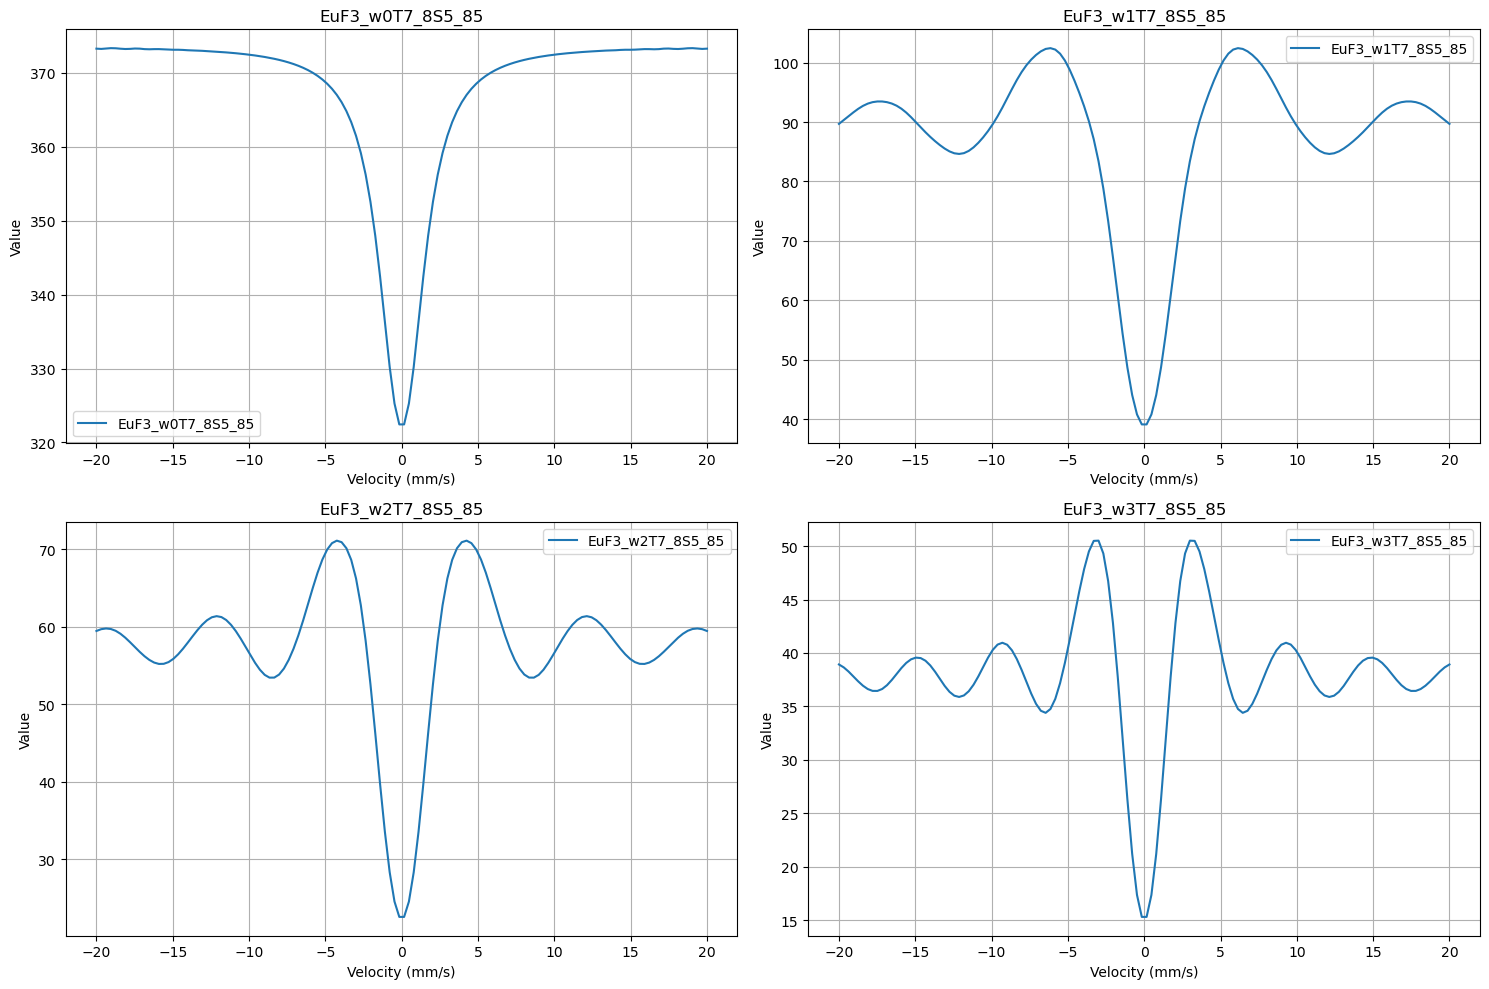

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# データの圧縮0.01倍

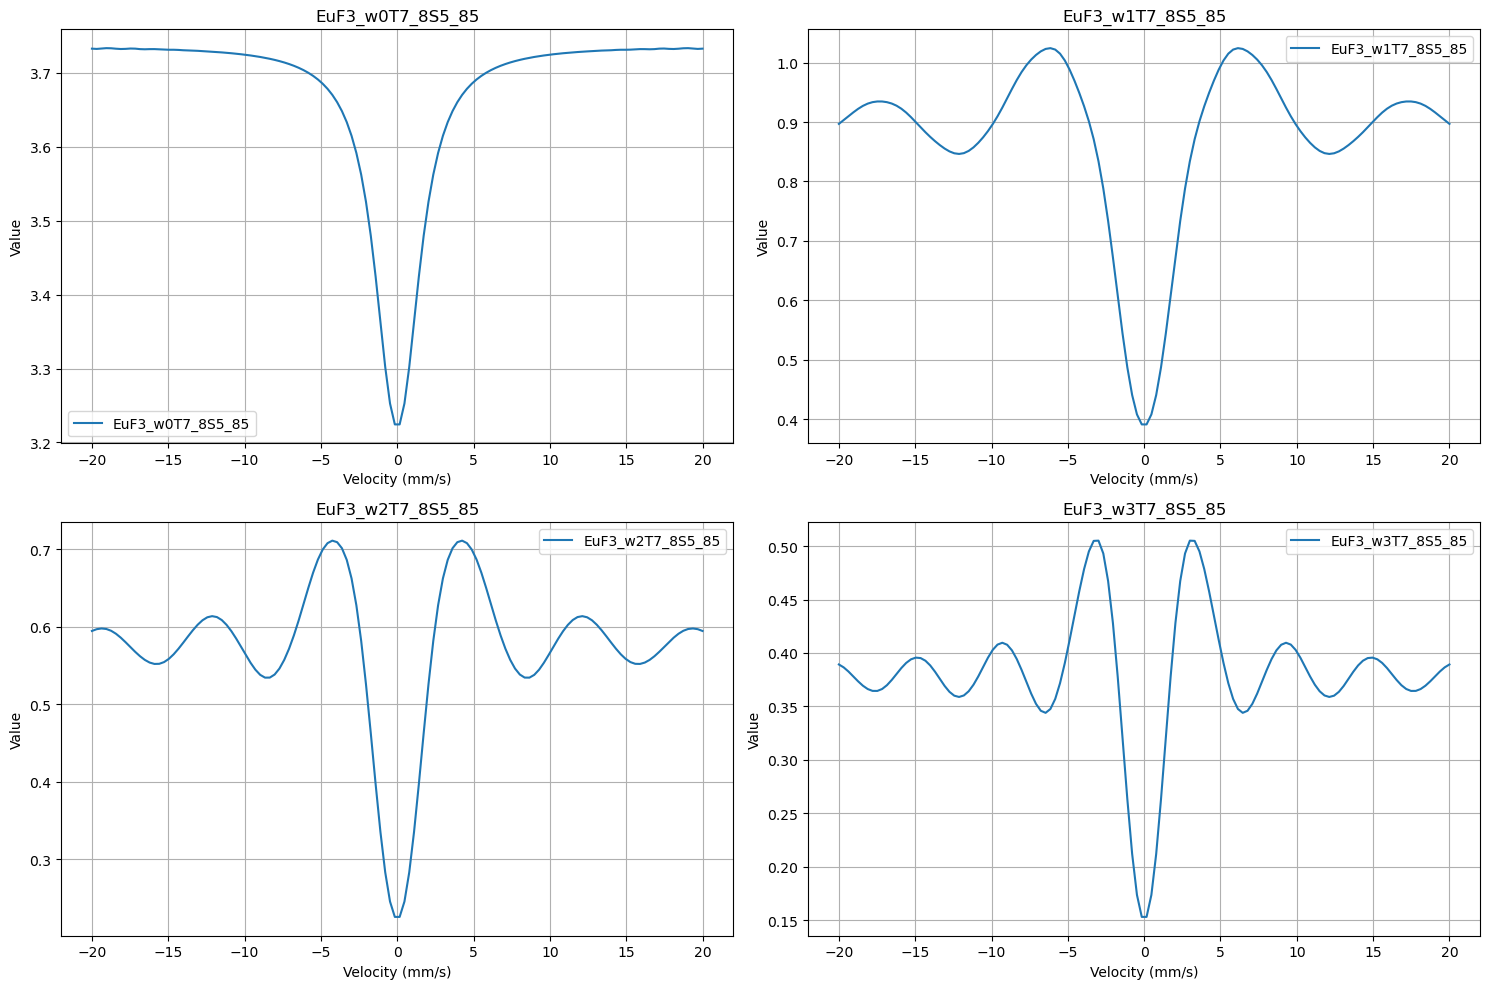

In [128]:
# 2列目から5列目までのデータの値を10分の1にする
data[data.columns[1:5]] = data[data.columns[1:5]] / 100

# 圧縮後のデータを表示
data

# x軸のデータ
x = data['Velocity (mm/s)']

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 2x2の配置でグラフを表示
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.plot(x, data[column], label=column)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# データにノイズ付加

In [129]:
import pandas as pd
import numpy as np

# 0行目のデータを取得
row_at_zero_index = data.iloc[0]

# データをコピーして新しいデータフレームを作成
data_noisy = data.copy()

# カラムのリストを取得
columns_to_plot = data.columns[1:].tolist()

# 各カラムのデータに正規乱数のノイズを追加
for column in columns_to_plot:
    np.random.seed(0)
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data[column].values
    noise = np.random.normal(0, np.sqrt(variance))
    data_noisy[column] = data[column] + noise

In [130]:
row_at_zero_index

Velocity (mm/s)    -20.000000
EuF3_w0T7_8S5_85     3.732750
EuF3_w1T7_8S5_85     0.896837
EuF3_w2T7_8S5_85     0.594463
EuF3_w3T7_8S5_85     0.389245
Name: 0, dtype: float64

In [131]:
columns_to_plot

['EuF3_w0T7_8S5_85',
 'EuF3_w1T7_8S5_85',
 'EuF3_w2T7_8S5_85',
 'EuF3_w3T7_8S5_85']

In [132]:
len(data)

128

# 付加したデータの可視化

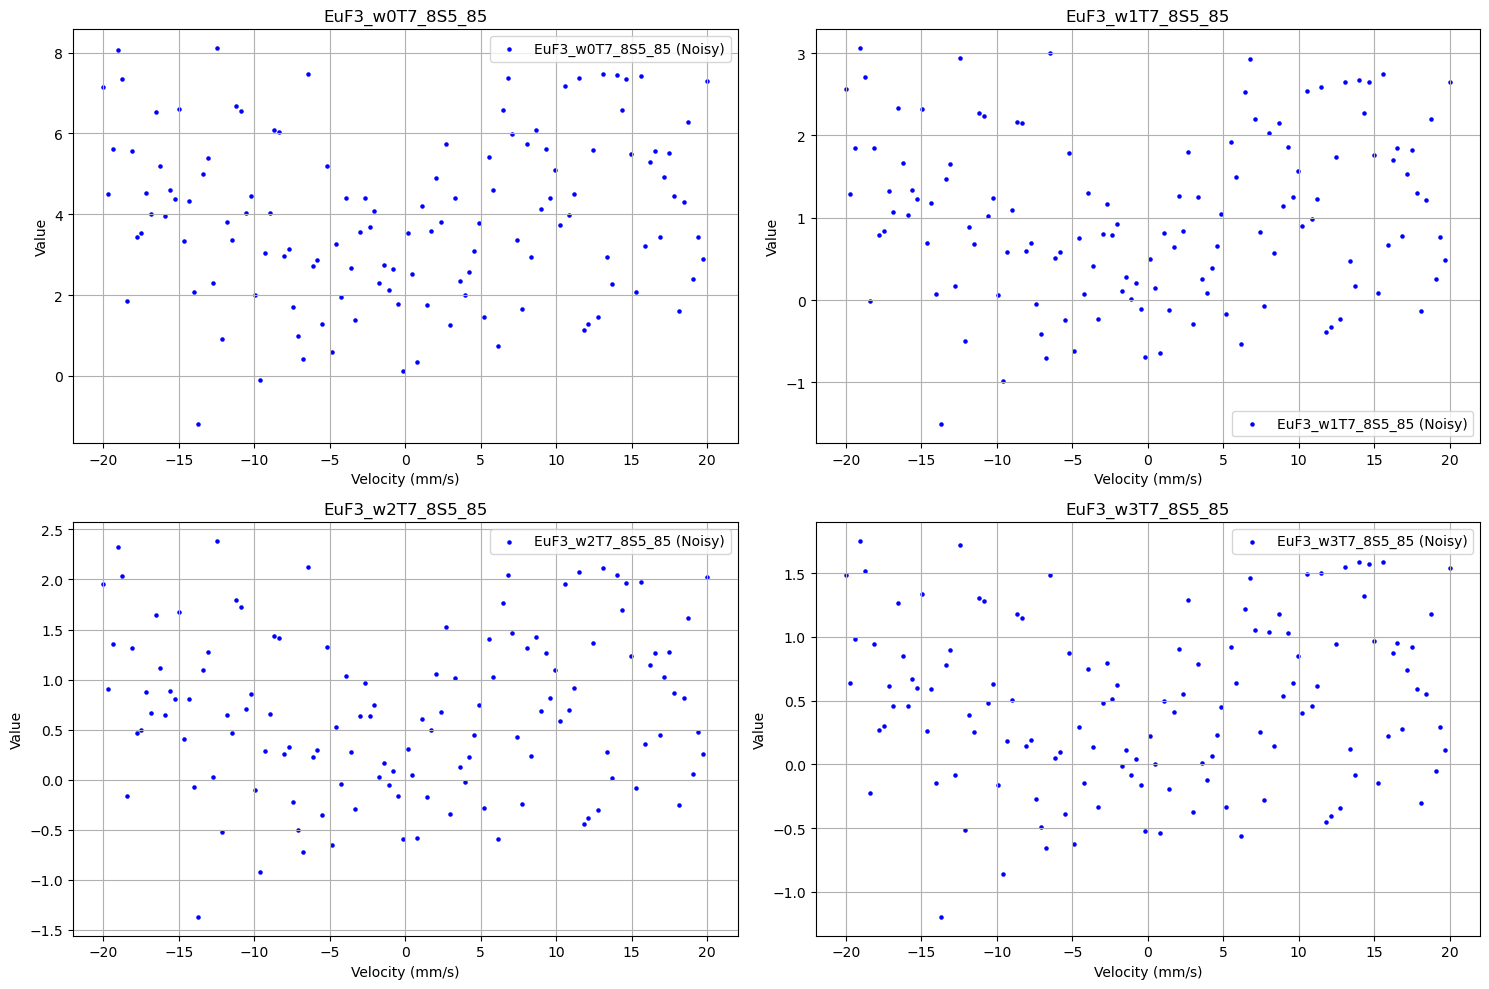

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# x軸のデータ
x = data['Velocity (mm/s)']

# 2x2の配置で散布図をプロット
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, column in zip(axes.ravel(), columns_to_plot):
    ax.scatter(x, data_noisy[column], label=column + ' (Noisy)', color='blue', s=5)
    ax.set_title(column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# ランダムなデータの作成

In [134]:
# 新しいデータフレームを作成
data_random_noise = pd.DataFrame()
data_random_noise['Velocity (mm/s)'] = data['Velocity (mm/s)']

np.random.seed(00)

# 2列目から5列目までのカラムにランダムなノイズを追加
for column in columns_to_plot:
    mean = row_at_zero_index[column]
    variance = row_at_zero_index[column]
    noise = np.random.normal(mean, np.sqrt(variance), size=data[column].shape)
    data_random_noise[column] = noise


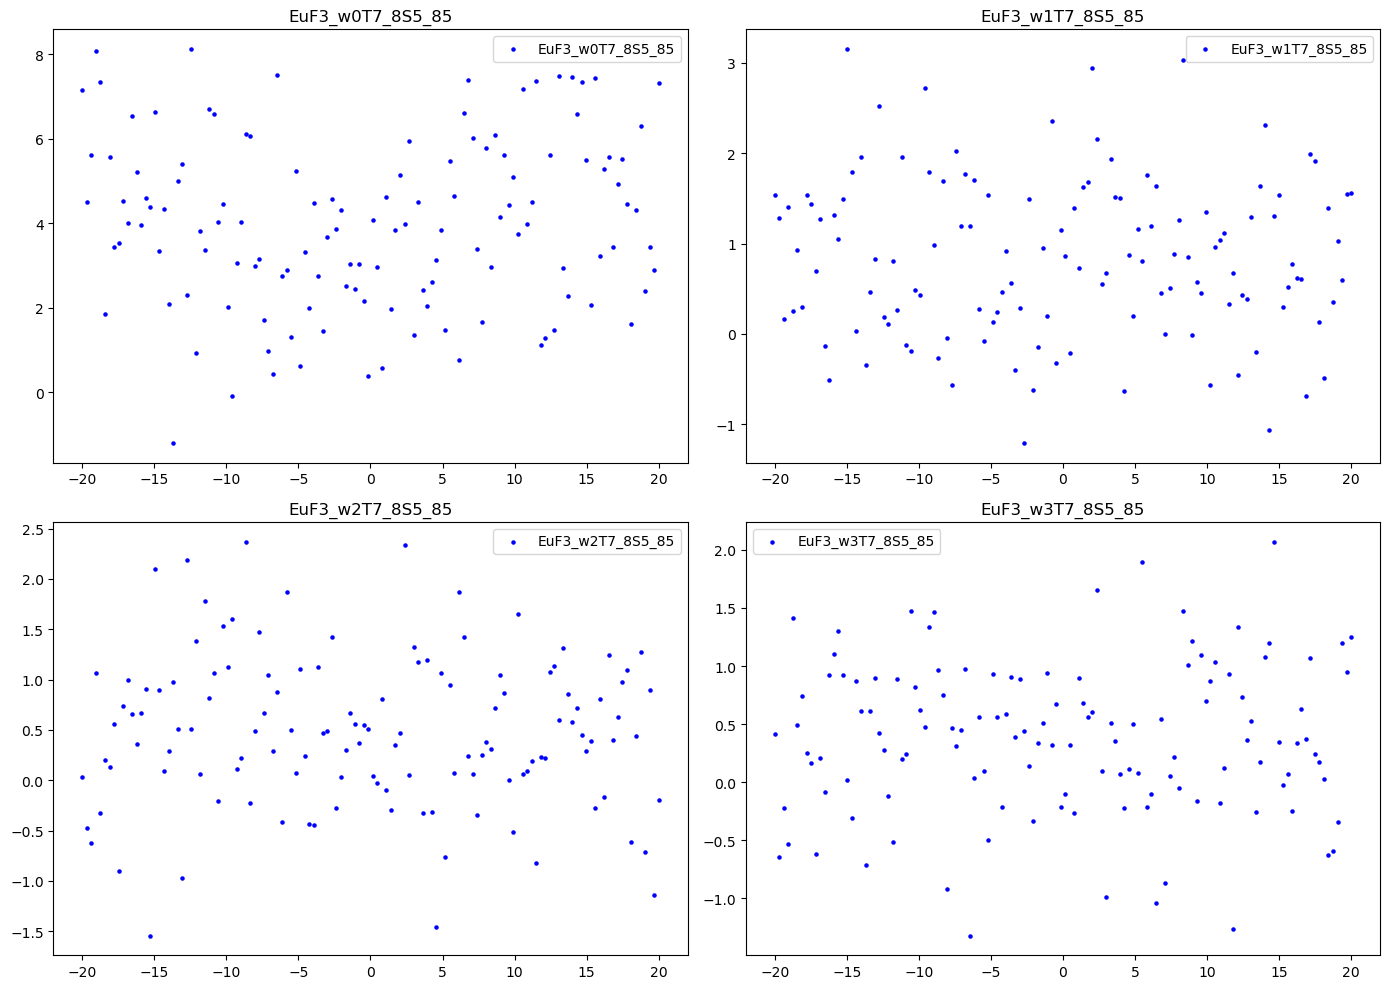

In [135]:
import matplotlib.pyplot as plt

# 可視化
plt.figure(figsize=(14, 10))

for idx, column in enumerate(data_random_noise.columns[1:]):
    plt.subplot(2, 2, idx+1)
    plt.scatter(data_random_noise['Velocity (mm/s)'], data_random_noise[column], label=column, color='blue', s=5)
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()

# 2つのデータの比較

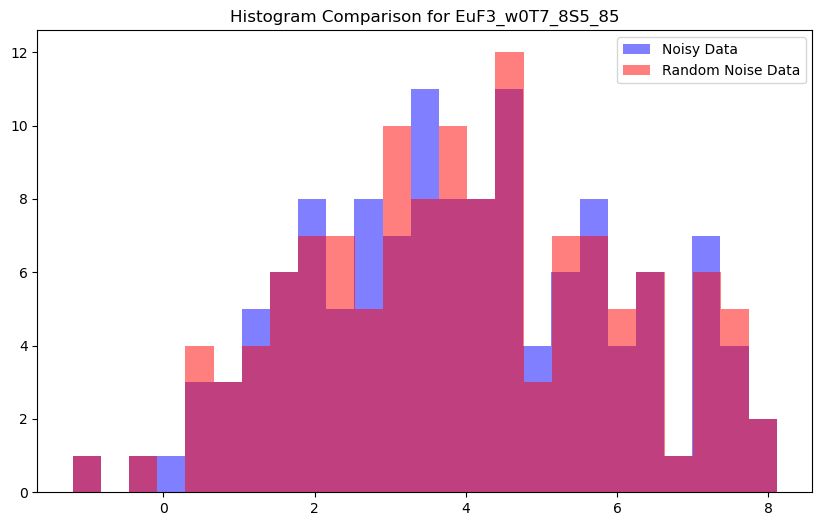

In [136]:
import matplotlib.pyplot as plt

# ヒストグラムの設定
plt.figure(figsize=(10, 6))

# data_noisyの2列目のデータをヒストグラムでプロット
plt.hist(data_noisy[columns_to_plot[0]], bins=25, alpha=0.5, label='Noisy Data', color='blue')

# data_random_noiseの2列目のデータをヒストグラムでプロット
plt.hist(data_random_noise[columns_to_plot[0]], bins=25, alpha=0.5, label='Random Noise Data', color='red')

plt.title(f'Histogram Comparison for {columns_to_plot[0]}')
plt.legend()
plt.show()

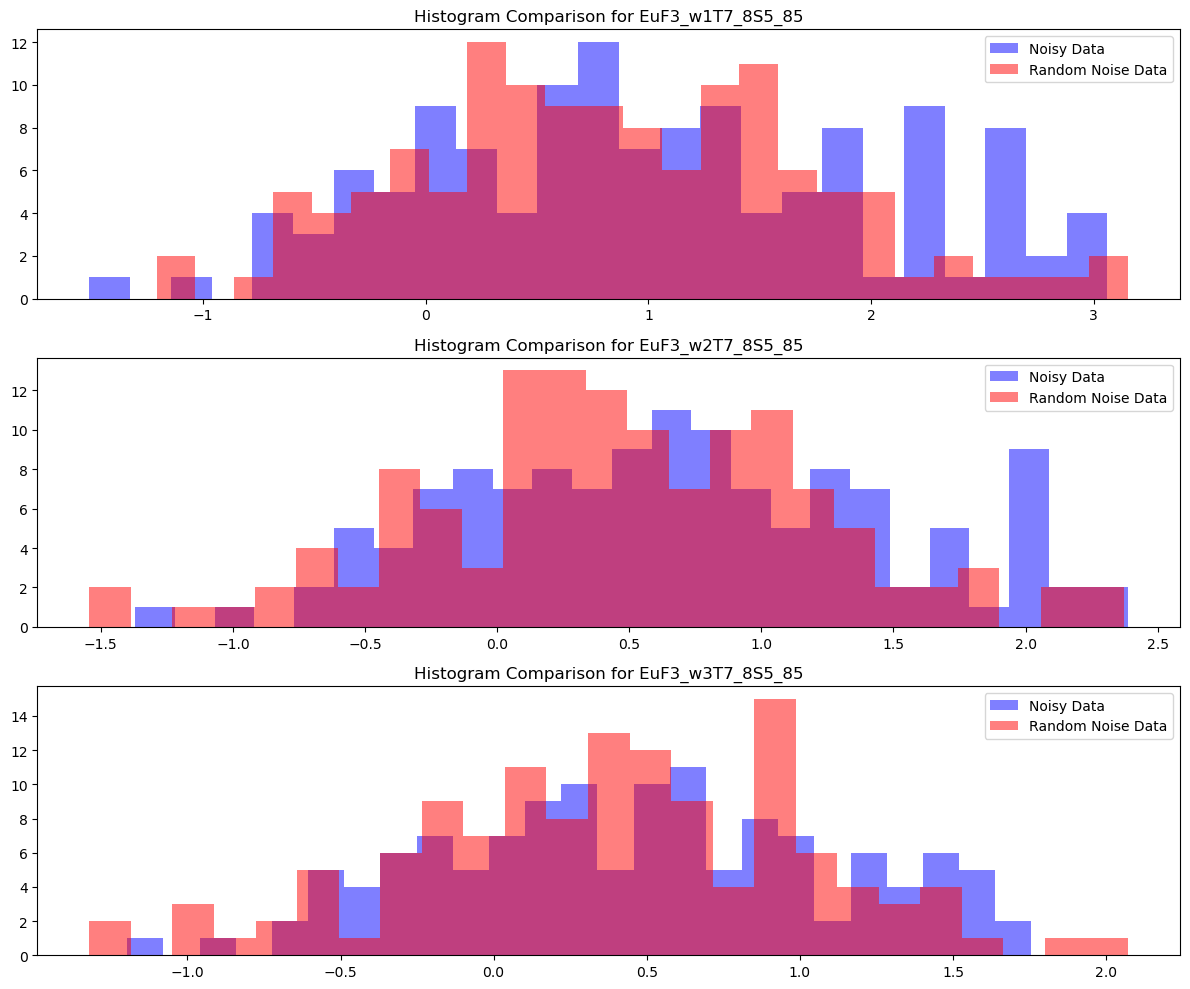

In [137]:
import matplotlib.pyplot as plt

# ヒストグラムの設定
plt.figure(figsize=(12, 10))

for idx, column in enumerate(columns_to_plot[1:4], start=1):
    plt.subplot(3, 1, idx)
    
    # data_noisyのデータをヒストグラムでプロット
    plt.hist(data_noisy[column], bins=25, alpha=0.5, label='Noisy Data', color='blue')
    
    # data_random_noiseのデータをヒストグラムでプロット
    plt.hist(data_random_noise[column], bins=25, alpha=0.5, label='Random Noise Data', color='red')
    
    plt.title(f'Histogram Comparison for {column}')
    plt.legend()

plt.tight_layout()
plt.show()

# データセットの作成

In [138]:
# 空のデータフレームを作成
dataset = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w0T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset[column_name] = data['EuF3_w0T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w0T7_8S5_85'], np.sqrt(row_at_zero_index['EuF3_w0T7_8S5_85']), size=data['EuF3_w0T7_8S5_85'].shape)
    dataset[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [139]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [140]:
# 確認
dataset.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,7.140957,6.871038,2.927560,7.188439,3.830437,4.585216,3.130374,6.998901,3.908961,...,2.558948,3.209725,4.692418,4.230055,2.282538,3.783707,4.862749,2.094368,1.813022,1.717333
1,-19.685039,4.505477,2.550520,3.623693,4.575708,4.698274,3.093175,5.140790,2.832233,5.840691,...,3.489050,3.935320,3.465619,1.977534,6.275996,4.235700,6.111461,6.255804,1.678225,2.146830
2,-19.370079,5.623861,2.712413,-0.394394,3.919315,1.808715,8.429283,4.153719,3.796286,-0.028798,...,2.410068,4.216778,4.984106,3.001470,6.140333,2.969316,5.320688,5.518350,2.499967,5.017834
3,-19.055118,8.063320,1.660239,6.902791,0.132779,5.073620,3.246345,1.996205,4.520848,1.054720,...,5.527057,1.945234,6.675294,2.699276,0.632001,3.338034,2.188615,4.970047,5.783774,7.254125
4,-18.740157,7.341702,5.405380,0.268052,3.197308,2.925040,3.945053,-1.071607,2.208937,-0.703936,...,0.169307,4.828490,3.280358,5.390576,0.896249,1.275914,4.528850,1.694964,3.428640,0.947564


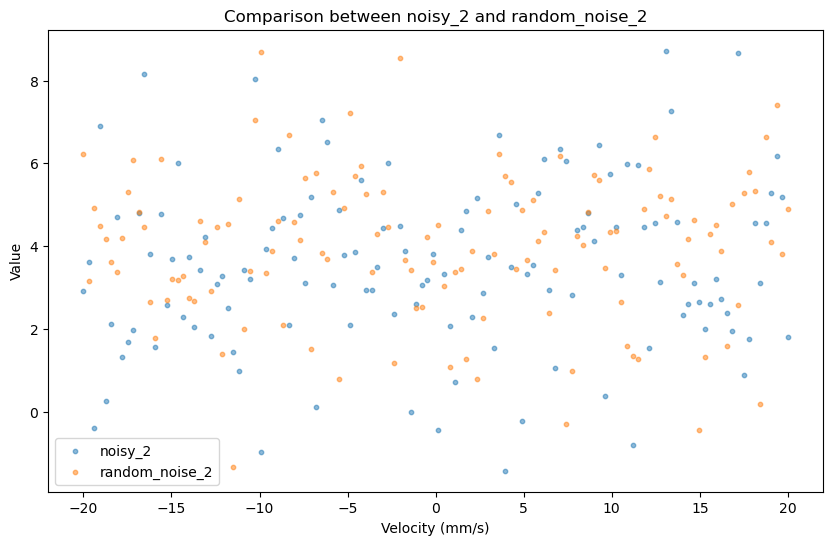

In [141]:
# noisy_2とrandom_noise_2の可視化
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Velocity (mm/s)"], dataset["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset["Velocity (mm/s)"], dataset["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

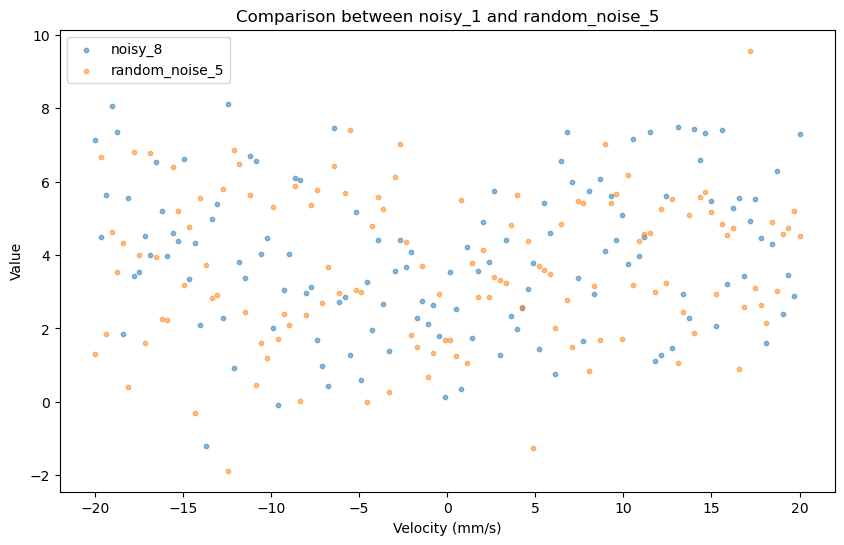

In [142]:
# noisy_8とrandom_noise_5の可視化
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Velocity (mm/s)"], dataset["noisy_0"], label="noisy_8", alpha=0.5, s=10)
plt.scatter(dataset["Velocity (mm/s)"], dataset["random_noise_5"], label="random_noise_5", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_1 and random_noise_5")
plt.show()

わたしには区別がつかない．

# ロジスティック回帰
128次元のy軸値を入力変数とするロジスティック回帰を行う．

              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.36      0.80      0.50         5

    accuracy                           0.47        15
   macro avg       0.56      0.55      0.46        15
weighted avg       0.62      0.47      0.45        15



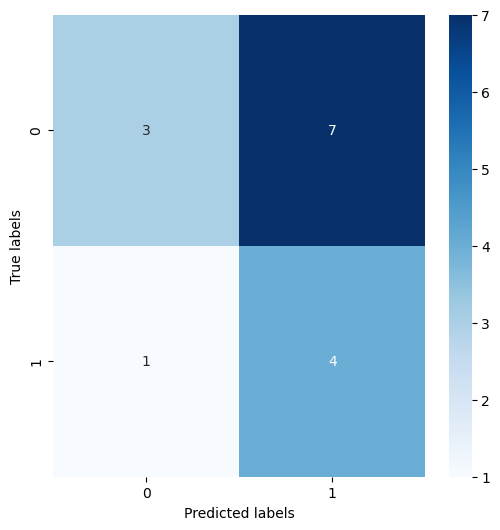

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## 結果の説明
真陰性：実際に陰性であるものを陰性と判定できたもの

真陽性：実際に陽性であるものを陽性と判定できたもの

偽陽性：実際に陰性であるものを陽性と判定できたもの

偽陰性：実際に陽性であるものを陰性と判定できたもの

In [144]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,3.116715,0.635739,0.766659,2.630717,3.314024,4.225176,3.444008,7.617648,3.545760,4.548458,...,-1.278825,2.296592,6.667569,5.181573,-0.651200,2.263247,1.886689,5.517854,4.341645,6.323432
random_noise_5,1.290559,6.684713,1.857305,4.641887,3.538201,4.319689,0.398134,6.795206,3.992216,1.594269,...,9.568447,3.102700,2.627567,2.158188,4.891283,3.012811,4.578396,4.726024,5.197605,4.514234
random_noise_6,2.931426,3.088671,3.889423,2.204460,3.310408,2.258229,2.231328,7.305767,2.369507,3.566514,...,2.301007,3.622044,2.383108,4.546892,4.268760,3.053785,5.022069,3.629604,2.459960,5.332824
random_noise_9,4.203848,2.288907,0.716505,2.835798,3.052554,1.256866,4.291686,5.626197,4.656115,4.603746,...,1.553463,-0.777967,2.896993,4.266869,5.532674,4.932117,3.100789,1.956075,3.288492,7.576507
noisy_16,3.979951,0.779476,2.584325,3.861605,1.346086,2.532186,2.014909,4.696332,2.212579,3.962185,...,1.711988,3.259495,2.299233,3.790272,4.529839,4.946304,3.947802,1.797236,7.062994,7.327411
random_noise_4,2.926161,5.096827,7.434495,-0.405191,5.121992,4.635150,5.214083,5.436821,5.295283,1.902797,...,4.086273,3.071174,3.911672,4.066075,2.334723,4.181588,2.076818,6.160234,2.570569,5.270692
noisy_0,7.140957,4.505477,5.623861,8.063320,7.341702,1.844564,5.567762,3.440044,3.533498,4.526060,...,4.919192,5.514700,4.459698,1.608333,4.308879,6.296067,2.391389,3.443772,2.891706,7.305588
noisy_17,4.266505,0.149365,4.938293,5.946424,5.737293,7.377692,3.516485,3.032895,4.020177,2.886955,...,6.270530,5.478315,-0.321031,3.234280,5.710337,3.125291,5.806522,3.795865,8.611041,3.394831
random_noise_21,4.862749,6.111461,5.320688,2.188615,4.528850,3.392410,3.591380,2.639864,3.552172,5.389084,...,7.555250,4.098189,5.337423,6.212095,7.668852,-0.042362,4.515270,4.599126,5.869204,2.866805
random_noise_10,0.081717,2.933677,2.252763,1.947307,0.986177,5.288531,5.952389,5.992124,2.183242,5.128601,...,6.099711,8.068214,3.803611,1.988513,6.753310,1.763976,2.487958,7.368603,1.906022,4.993830


In [145]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 1
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 1
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 1
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 1
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 0
Sample: random_noise_11, Prediction: 1
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 1
Sample: random_noise_23, Prediction: 1


偽陽性と偽陰性がともに現れた

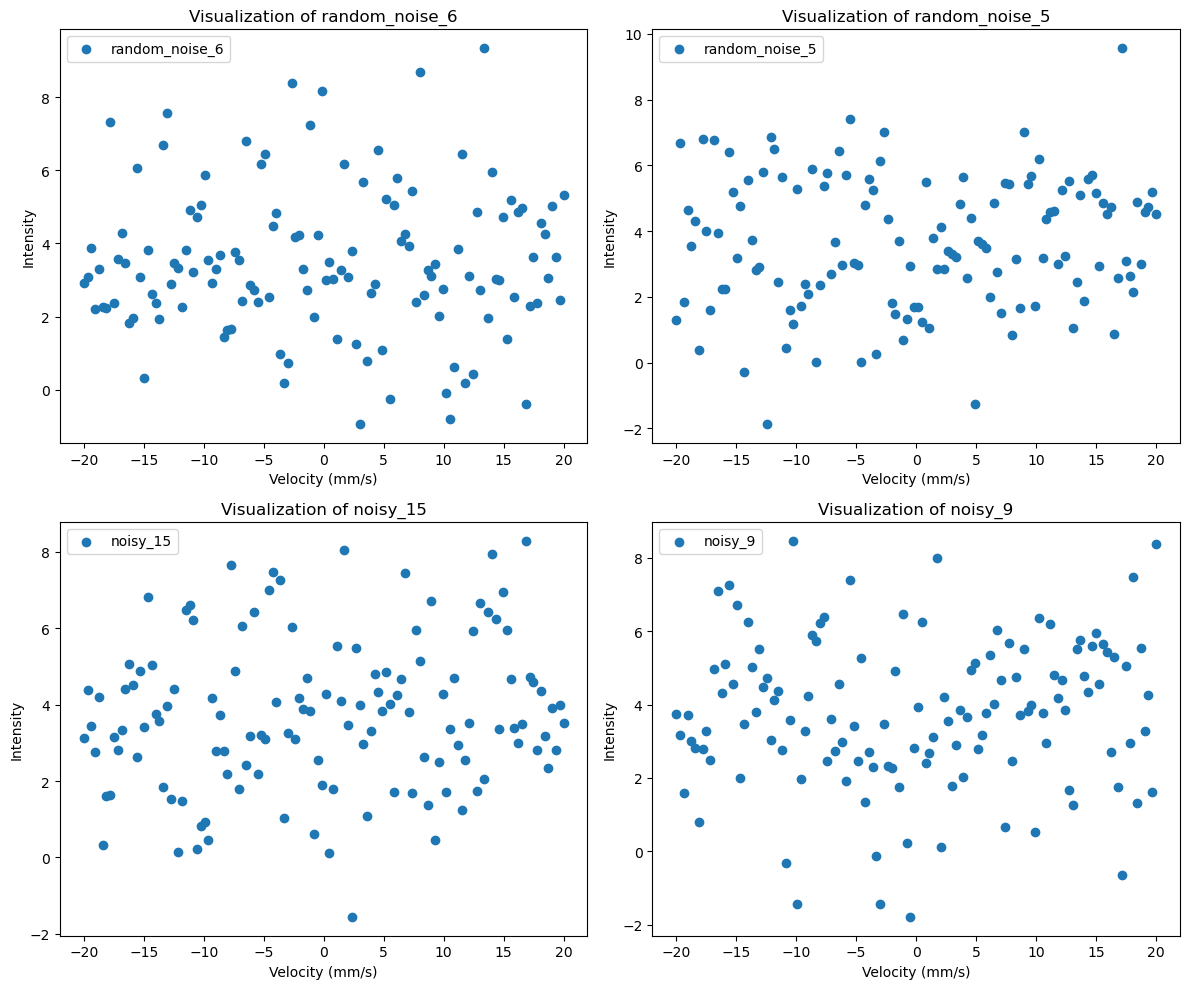

In [146]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['random_noise_6' ,  'random_noise_5',  'noisy_15' , 'noisy_9']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset['Velocity (mm/s)'], dataset[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

# その他のデータで同じことをする

## EuF3_w1T7_8S5_85

In [147]:
# 空のデータフレームを作成
dataset_w1 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 10)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w1T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w1[column_name] = data['EuF3_w1T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 10)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w1T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w1T7_8S5_85']), size=data['EuF3_w1T7_8S5_85'].shape)
    dataset_w1[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w1.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

In [148]:
# 確認
dataset_w1.head()

,Velocity (mm/s),noisy_0,noisy_1,noisy_2,noisy_3,noisy_4,noisy_5,noisy_6,noisy_7,noisy_8,...,random_noise_15,random_noise_16,random_noise_17,random_noise_18,random_noise_19,random_noise_20,random_noise_21,random_noise_22,random_noise_23,random_noise_24
0,-20.000000,2.157869,2.553597,1.344762,0.222193,2.365978,0.601057,1.018006,1.158465,0.972057,...,-0.580839,0.621726,1.388788,1.091794,-0.857234,-0.640860,-0.085826,0.772729,0.176930,-0.683999
1,-19.685039,1.582951,0.631308,0.255582,1.619528,0.978435,1.225622,-0.549417,-0.859380,2.984656,...,0.867501,1.003024,-0.304688,2.001778,-0.126885,0.800446,1.459040,0.706822,-1.093394,1.430212
2,-19.370079,-0.564270,0.447548,1.140962,0.867277,1.075662,0.761019,0.342724,1.504798,0.781065,...,0.308809,2.081359,1.124518,-1.065984,0.971238,-0.817062,1.941092,-0.703734,0.129986,1.294947
3,-19.055118,0.908152,-1.623504,-0.711718,1.348639,0.846939,0.435878,0.979667,2.012436,1.069820,...,-0.490142,-0.391946,0.135478,0.297673,-0.385549,1.145574,0.411797,0.144511,0.889718,-0.619674
4,-18.740157,1.518783,0.914174,1.645354,2.213798,-1.002579,1.148341,-0.264286,1.918118,1.347242,...,2.233971,0.991475,0.913262,1.841131,1.489809,1.143016,0.645481,2.343877,-0.717218,1.495669


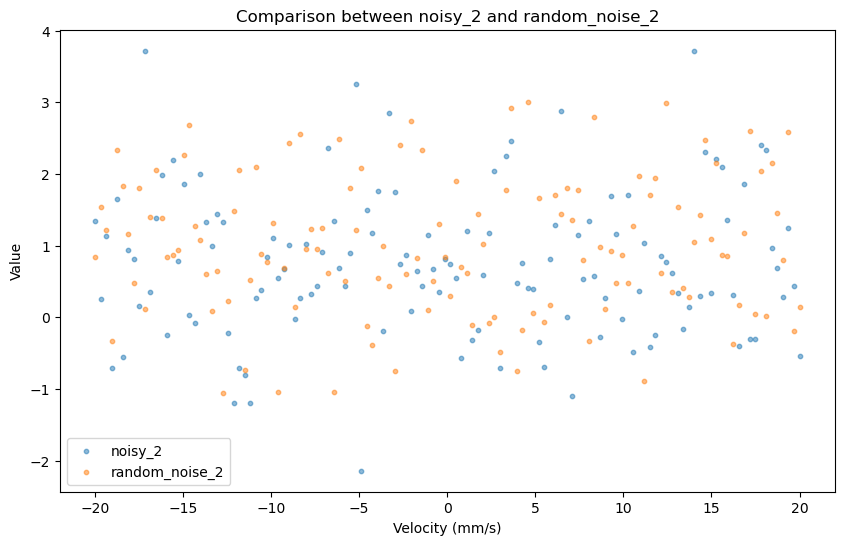

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w1["Velocity (mm/s)"], dataset_w1["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w1["Velocity (mm/s)"], dataset_w1["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.67        15
weighted avg       0.83      0.67      0.67        15



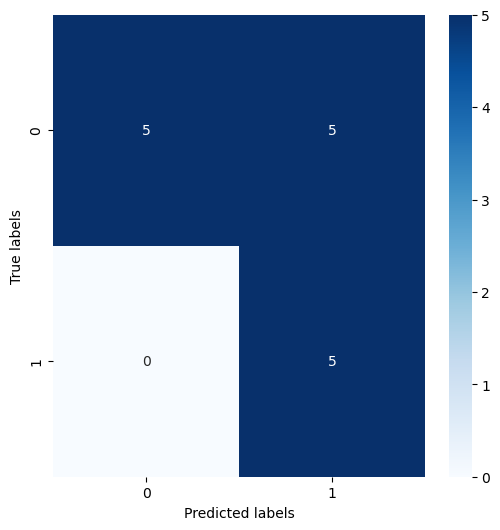

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w1.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [151]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,1.140599,0.036492,0.538389,0.390264,1.709445,0.505711,1.368629,2.800526,2.092786,0.480894,...,0.810853,0.115474,0.579616,1.577126,-1.015624,0.747181,0.343577,0.830256,2.576066,0.473873
random_noise_5,0.321480,0.777384,0.248505,1.776344,-0.849838,0.454579,3.067860,1.359748,1.569471,1.896444,...,-0.607108,0.017997,0.372980,0.695548,0.202211,1.247923,1.873117,1.184723,1.439568,-0.257184
random_noise_6,0.640469,0.996130,1.134091,0.020659,1.433931,-0.088229,0.751304,1.644839,-0.264407,-0.000940,...,-0.067434,-0.919508,0.534183,2.446490,-0.527070,0.886032,1.616775,1.365248,0.981676,0.579943
random_noise_9,0.185994,2.143447,2.076950,-0.623042,-0.493517,-0.727360,2.657133,0.979784,0.847287,1.422877,...,0.822288,2.295761,1.965192,-0.130399,-0.856208,2.159339,3.019016,0.155260,1.127477,-0.059698
noisy_16,1.082446,-0.941689,1.590529,1.549966,0.702359,1.188828,0.902916,-0.766577,0.166714,1.536437,...,1.091671,0.934372,-1.078740,0.551247,-0.360269,2.760368,1.143475,0.992814,-0.651056,-0.632366
random_noise_4,2.227241,1.106242,0.759210,1.013509,1.470754,3.191236,-0.918220,-1.397332,1.508887,1.087661,...,1.239114,1.286244,1.920693,0.102317,0.284057,0.173321,0.413141,2.488323,0.395387,0.172332
noisy_0,2.157869,1.582951,-0.564270,0.908152,1.518783,0.233796,1.187146,1.038290,0.938718,0.765750,...,1.198499,-0.630154,0.379712,-0.343089,2.117493,3.289522,2.240168,1.239959,1.874936,1.054809
noisy_17,2.114325,0.614696,1.500195,1.295216,1.136661,0.874838,0.757986,1.168026,1.728311,2.111083,...,0.362094,1.707703,1.957884,1.728762,-0.838262,2.363599,1.103658,2.723790,0.939535,1.469170
random_noise_21,-0.085826,1.459040,1.941092,0.411797,0.645481,-0.634492,0.639709,1.792291,0.303066,0.644981,...,0.877261,0.876210,1.782579,0.347041,0.138949,0.650877,0.313804,-0.393582,0.128900,-0.130572
random_noise_10,0.921814,1.143366,0.522628,0.703361,-0.307418,-1.562446,1.171169,0.069805,1.270030,1.782396,...,-0.010381,0.706420,1.184657,0.670910,1.426861,-0.408978,2.194069,-0.819572,1.021537,2.563777


In [152]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 1
Sample: random_noise_5, Prediction: 0
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 1
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 1
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 1
Sample: random_noise_23, Prediction: 1


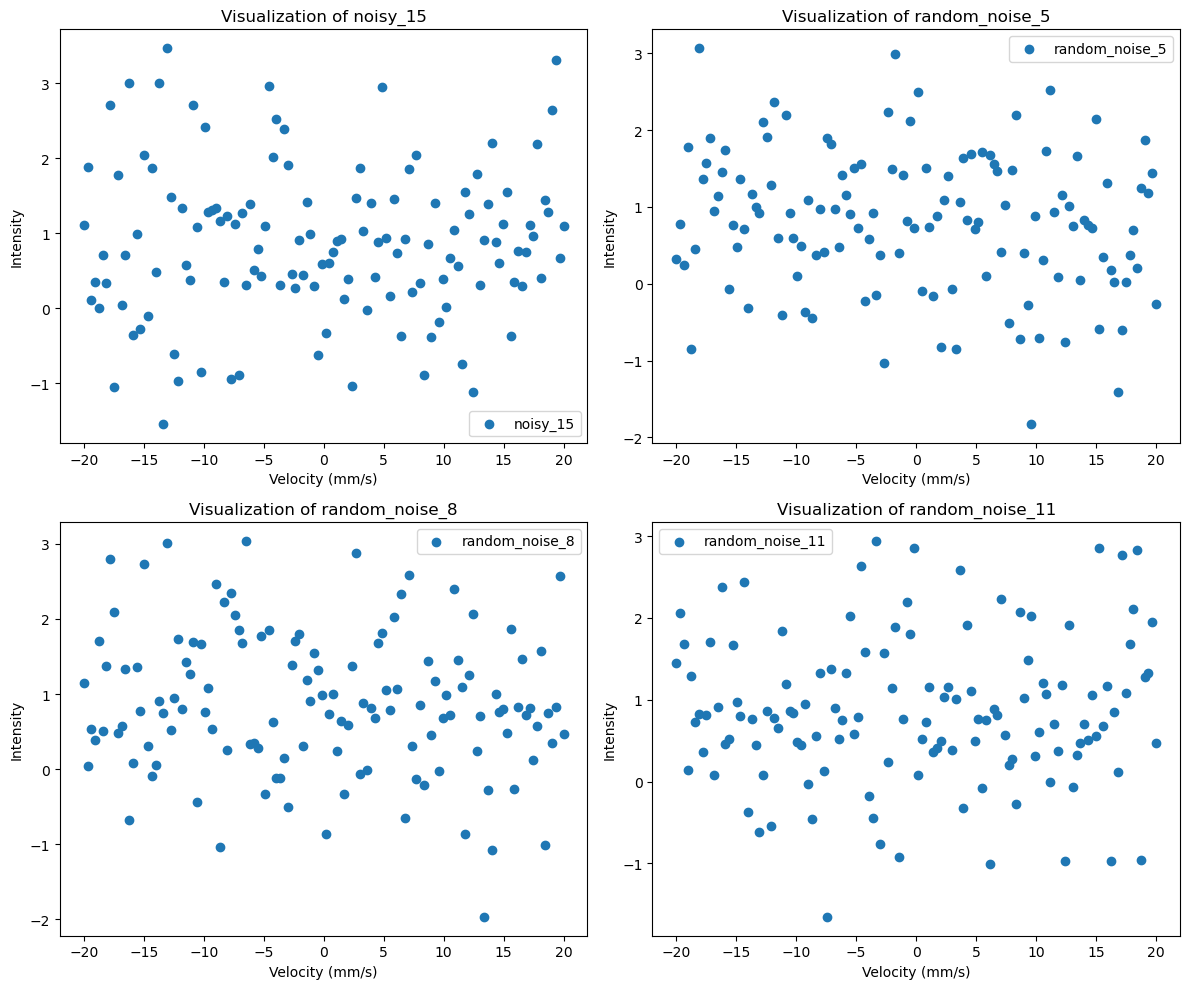

In [153]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['noisy_15' , 'random_noise_5','random_noise_8' , 'random_noise_11' ]

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w1['Velocity (mm/s)'], dataset_w1[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

## EuF3_w2T7_8S5_85

In [154]:
# 空のデータフレームを作成
dataset_w2 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 20)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w2T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w2[column_name] = data['EuF3_w2T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 20)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w2T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w2T7_8S5_85']), size=data['EuF3_w2T7_8S5_85'].shape)
    dataset_w2[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w2.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

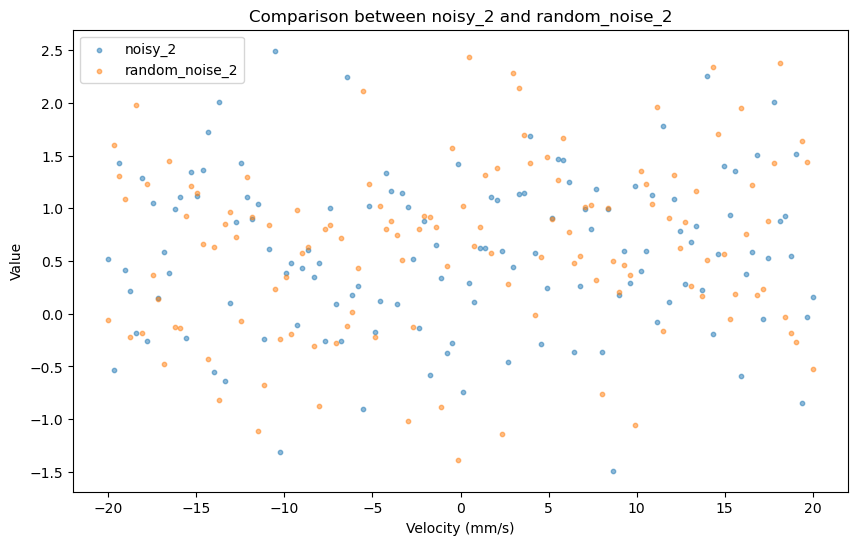

In [155]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w2["Velocity (mm/s)"], dataset_w2["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w2["Velocity (mm/s)"], dataset_w2["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.78      0.80      0.73        15
weighted avg       0.85      0.73      0.74        15



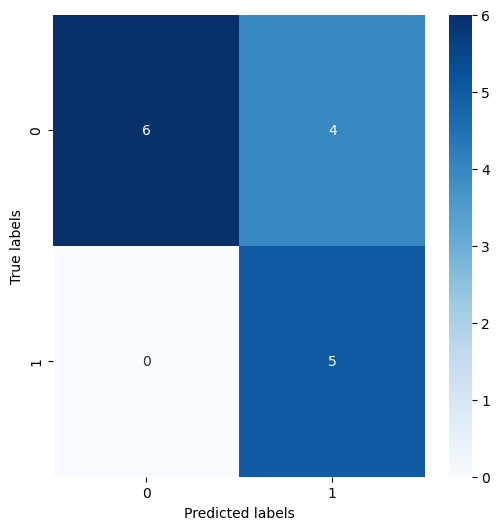

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w2.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [157]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,0.753188,1.494053,-1.003572,0.106652,1.363262,2.440698,0.177164,1.174809,-1.063489,0.358964,...,0.941949,1.714461,1.780917,1.386549,2.306727,0.795728,1.123483,0.928536,-0.734237,2.097688
random_noise_5,-0.608591,0.570579,0.115718,-0.534749,1.683093,0.226896,-0.007290,1.419654,-0.394203,-0.429042,...,-0.254030,-0.297799,1.988491,-0.262272,1.265565,1.171932,1.141523,0.838219,-0.005551,0.181229
random_noise_6,0.370481,0.680915,1.558844,-0.454803,0.671513,0.557461,0.319805,-0.244832,0.323823,2.590156,...,1.107797,-1.411090,-1.092722,0.876829,1.470202,1.517571,1.308855,-0.573982,0.513703,0.425999
random_noise_9,-0.833618,-0.239003,0.655037,-0.449595,1.077232,1.159915,-0.539682,-0.697309,1.043985,0.072131,...,-0.134164,-0.286280,0.758620,0.569874,-0.898220,0.283571,0.204978,0.954897,1.689305,1.085040
noisy_16,1.115987,1.771880,0.201964,1.485741,0.139161,-0.000062,0.329407,0.650764,-0.469700,0.739248,...,1.419547,1.624226,0.412804,-0.573682,0.278248,0.185254,0.500798,-0.824776,1.916630,1.899211
random_noise_4,-0.209828,-0.038429,1.107300,1.999734,-0.517018,0.774732,0.856314,0.772732,0.586810,1.985255,...,-0.954359,0.014046,0.722609,0.073774,0.466551,0.830662,-0.569632,0.046239,0.288235,0.399787
noisy_0,1.275957,0.748104,0.874117,-1.213550,-0.241887,1.021106,1.304879,-0.165210,0.954760,0.873721,...,0.292527,0.949968,0.800452,0.225927,1.825378,0.476205,-0.783100,0.511378,1.784661,-0.200940
noisy_17,0.552471,1.117713,0.865698,-0.407719,1.765737,1.351739,0.798353,0.238323,1.302321,-0.055916,...,1.922113,-0.111264,1.496401,-0.123733,1.606086,1.045085,0.521818,1.976539,-0.285520,-0.022902
random_noise_21,1.685922,-0.242308,0.119281,0.010870,0.862042,1.794540,-1.684924,1.642333,1.094347,0.814995,...,0.508775,0.139645,1.222052,0.793933,1.972302,1.057090,0.750003,1.164207,0.228464,0.563831
random_noise_10,-0.657457,0.515986,-0.800912,0.796973,0.794890,0.300640,0.592697,0.857853,1.286504,0.316050,...,1.291158,-0.809220,2.052294,0.315836,4.285589,1.986000,0.011009,0.450952,0.934111,2.286087


In [158]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 0
Sample: random_noise_5, Prediction: 1
Sample: random_noise_6, Prediction: 1
Sample: random_noise_9, Prediction: 1
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 0
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 0
Sample: random_noise_10, Prediction: 1
Sample: noisy_15, Prediction: 1
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 1
Sample: random_noise_13, Prediction: 0
Sample: random_noise_23, Prediction: 0


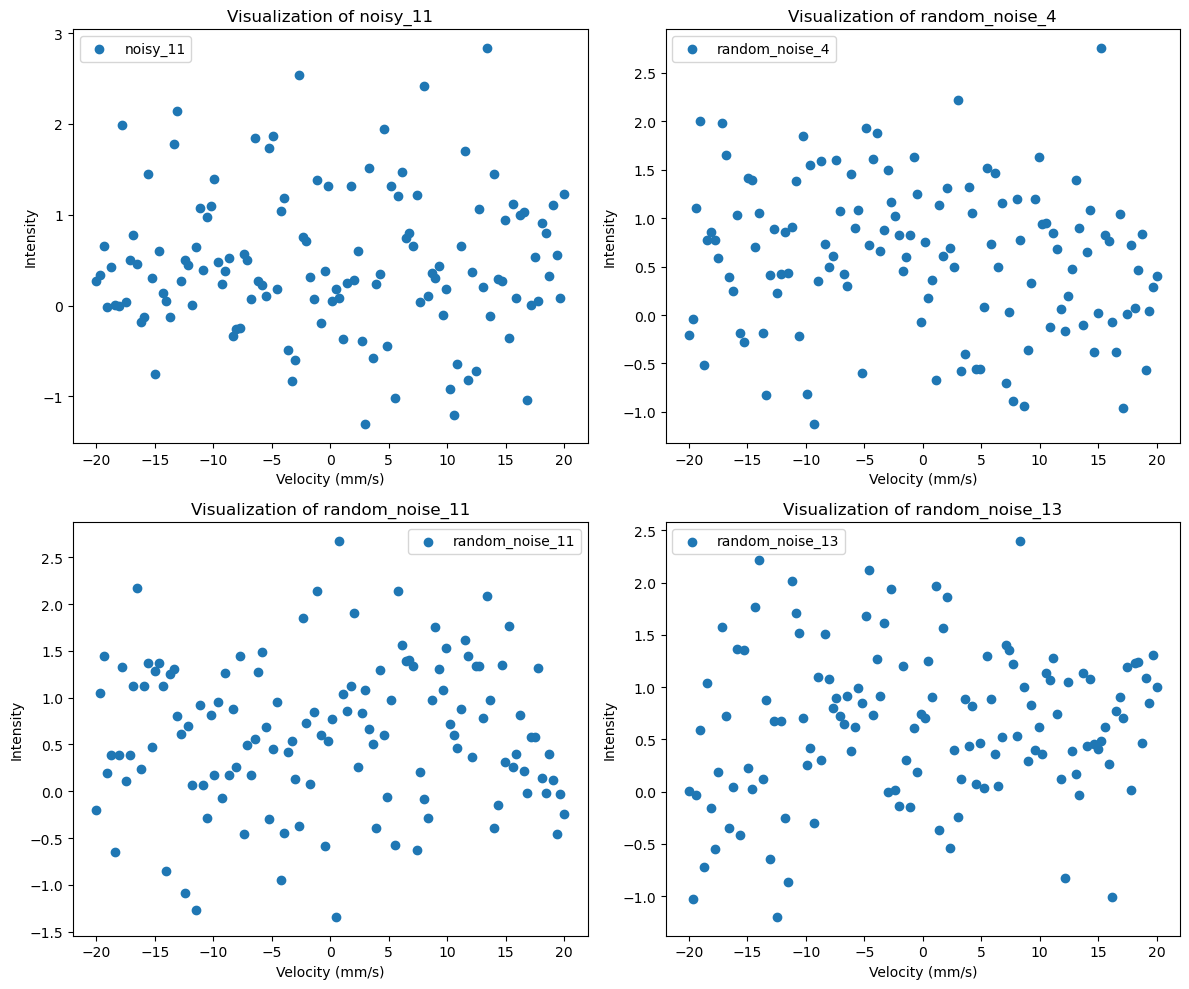

In [159]:

import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = [ 'noisy_11', 'random_noise_4', 'random_noise_11','random_noise_13']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w2['Velocity (mm/s)'], dataset_w2[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()

## EuF3_w3T7_8S5_85

In [160]:
# 空のデータフレームを作成
dataset_w3 = pd.DataFrame()

# データ数の設定
number = 25
random_number = 25

# 元データからノイズを付加したデータを作成
for i in range(number):
    np.random.seed(i + 30)
    column_name = f'noisy_{i}'
    # 正規乱数のノイズは、平均0、分散は各x軸のデータのy軸値
    variance = data['EuF3_w3T7_8S5_85'].values
    noise = np.random.normal(0, np.sqrt(variance))
    dataset_w3[column_name] = data['EuF3_w3T7_8S5_85'] + noise

# 乱数のみのデータを作成
for i in range(random_number):
    j = i + number
    np.random.seed(j + 30)
    column_name = f'random_noise_{i}'
    # 正規乱数のノイズは、平均は0行目のデータの値、分散も0行目のデータの値
    noise = np.random.normal(row_at_zero_index['EuF3_w3T7_8S5_85'] \
                             , np.sqrt(row_at_zero_index['EuF3_w3T7_8S5_85']), size=data['EuF3_w3T7_8S5_85'].shape)
    dataset_w3[column_name] = noise

# 教師信号を作成
y = [1]*number + [0]*random_number

# datasetの最初の列に元データの最初の列を追加
dataset_w3.insert(0, "Velocity (mm/s)", data["Velocity (mm/s)"])

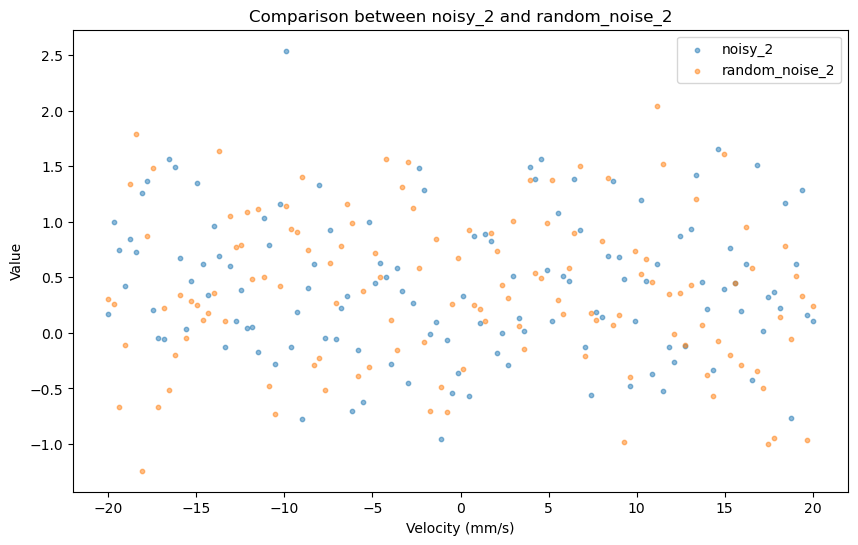

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_w3["Velocity (mm/s)"], dataset_w3["noisy_2"], label="noisy_2", alpha=0.5, s=10)
plt.scatter(dataset_w3["Velocity (mm/s)"], dataset_w3["random_noise_2"], label="random_noise_2", alpha=0.5, s=10)
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Value")
plt.legend()
plt.title("Comparison between noisy_2 and random_noise_2")
plt.show()

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.46      0.67      0.55         9

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.52      0.50      0.49        20



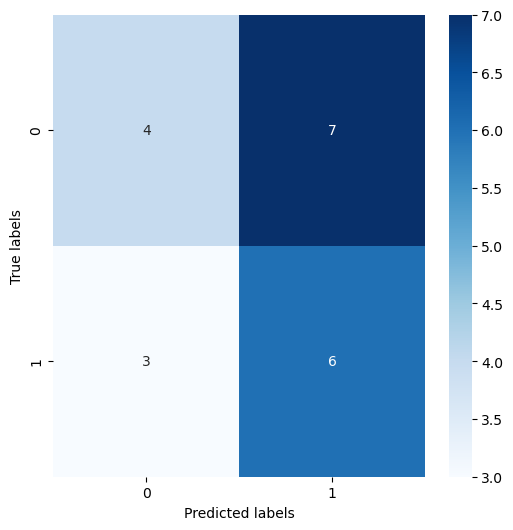

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 入力データとして、各カラムを1つのサンプルとする
X = dataset_w3.drop('Velocity (mm/s)', axis=1)
y = y

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.4, random_state=111)

# ロジスティック回帰モデルを訓練
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# テストデータを使って予測
y_pred = clf.predict(X_test)

# 評価
print(classification_report(y_test, y_pred))

# 混同行列の可視化
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [163]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
random_noise_8,-0.945253,1.083055,0.411582,-0.003907,0.389267,-0.365018,0.571191,-0.640591,-0.551045,0.554753,...,0.113756,0.856511,0.761690,1.244693,0.981526,0.636845,0.073143,-0.154151,0.366106,-0.115810
random_noise_5,-0.185843,0.023444,1.115459,-0.385460,-0.849330,1.204495,0.849560,0.625771,0.389862,-0.300181,...,0.787561,-0.245835,-0.362879,0.741972,0.670669,1.516885,-0.311385,0.058645,2.033392,-0.163750
random_noise_6,0.120037,0.663370,0.388458,1.051275,0.516124,0.804493,-0.261861,-0.411781,0.363332,-0.326972,...,0.101636,1.343734,0.313115,0.319198,0.872007,0.837556,-0.271103,-0.017215,-0.161023,0.522299
random_noise_9,1.075731,-0.847707,-0.328390,1.757395,-0.797051,0.118539,-0.319239,-0.255423,-1.090608,0.828055,...,0.184691,-0.171018,-0.191467,1.130572,-0.725074,0.463569,0.916063,-0.199461,-0.049632,-0.464338
noisy_16,0.754146,1.151971,0.891017,-0.113355,0.625280,0.262306,0.321968,0.022998,0.308064,0.885164,...,1.563737,0.478687,0.865983,1.142876,1.607535,-0.820635,0.627108,0.660000,1.074015,0.109613
random_noise_4,-0.652213,0.740634,0.651520,-0.609835,0.783757,-0.354480,-0.381296,1.494976,-0.310966,-0.979998,...,0.929674,-0.794861,0.333062,0.479381,1.075034,1.262099,0.370676,1.011200,-0.147190,-1.185648
noisy_0,-0.399391,1.336438,-0.217826,0.667405,0.311928,0.553997,-0.678278,1.321539,0.445572,-0.303599,...,2.194391,0.167611,0.019156,-0.126962,0.733802,0.145743,0.647198,0.700628,0.857901,0.641603
noisy_17,-0.139824,1.198419,0.954301,0.771842,-0.271103,1.461963,-0.246674,0.861794,0.186603,0.007721,...,0.080610,0.590079,1.017481,1.766360,-0.121361,-0.241088,-0.306892,1.217017,1.069205,-0.517490
random_noise_21,0.975895,0.041342,-0.271794,0.032602,0.456686,0.280485,0.279091,0.507808,-0.368813,1.296899,...,1.477923,-0.360223,0.609925,0.838074,0.084301,0.370214,-0.133032,0.449593,-0.682768,0.779426
random_noise_10,-0.130874,0.051019,-0.147413,0.076177,1.021479,0.853363,-0.604679,0.443993,0.409975,-0.589959,...,0.088786,0.709236,0.216000,0.144773,0.304606,0.461833,0.730647,-0.293308,0.751713,0.981541


In [164]:
# X_testの列名と予測結果を表示
for column_name, prediction in zip(X_test.index, y_pred):
    print(f"Sample: {column_name}, Prediction: {prediction}")

Sample: random_noise_8, Prediction: 1
Sample: random_noise_5, Prediction: 1
Sample: random_noise_6, Prediction: 0
Sample: random_noise_9, Prediction: 0
Sample: noisy_16, Prediction: 1
Sample: random_noise_4, Prediction: 1
Sample: noisy_0, Prediction: 1
Sample: noisy_17, Prediction: 1
Sample: random_noise_21, Prediction: 1
Sample: random_noise_10, Prediction: 0
Sample: noisy_15, Prediction: 0
Sample: random_noise_11, Prediction: 0
Sample: noisy_9, Prediction: 0
Sample: random_noise_13, Prediction: 1
Sample: random_noise_23, Prediction: 1
Sample: noisy_3, Prediction: 1
Sample: noisy_4, Prediction: 0
Sample: noisy_11, Prediction: 1
Sample: random_noise_18, Prediction: 1
Sample: noisy_23, Prediction: 1


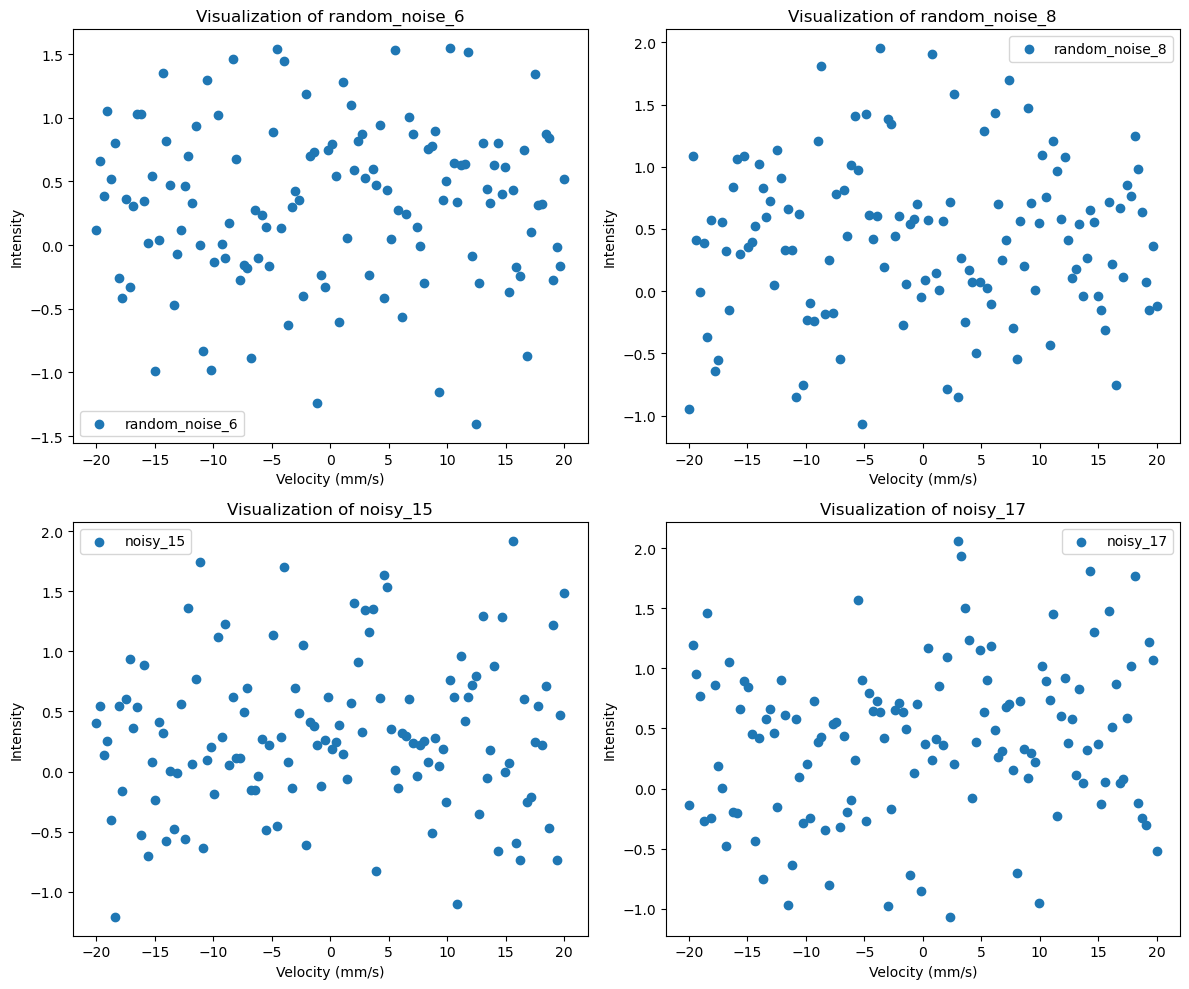

In [165]:
import matplotlib.pyplot as plt

# 指定されたカラムのデータをプロット
columns_to_visualize = ['random_noise_6', 'random_noise_8', 'noisy_15', 'noisy_17']

# 2x2のグリッドでプロット
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 各カラムのデータをプロット
for ax, column in zip(axes.ravel(), columns_to_visualize):
    ax.scatter(dataset_w3['Velocity (mm/s)'], dataset_w3[column], label=column)
    ax.set_xlabel('Velocity (mm/s)')
    ax.set_ylabel('Intensity')
    ax.legend()
    ax.set_title(f'Visualization of {column}')

plt.tight_layout()
plt.show()